# Predict Dish Recogntion


Content
1.   Load image
2.   load model
3.   prediction



In [ ]:
#import library
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.models import load_model
import numpy as np

**1. load image**

In [ ]:
img_path= '/content/drive/MyDrive/DATASET/output/test/Chao long/101.jpg' #Bánh chưng
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)

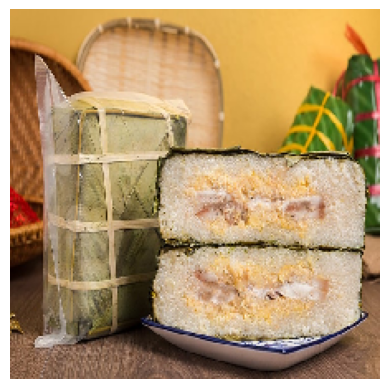

In [ ]:
plt.imshow(img.astype('uint8'))
plt.axis('off')
plt.show()

**2. Load mode**

In [ ]:
#load efficientnet
efficientNet = EfficientNetB0(include_top=False, weights="imagenet")
#load task model
classify_model = load_model('/content/drive/MyDrive/DATASET/Dish_Recognition_12.h5')

16705208/16705208 [==============================] - 0s 0us/step


**3. Prediction**

In [ ]:
feature = np.expand_dims(img, axis=0)
feature = preprocess_input(feature)
feature = efficientNet.predict(feature)
output = classify_model.predict(feature)

1/1 [==============================] - 0s 29ms/step


In [ ]:
LABELS = ['Banh chung','Banh mi', 'Banh tet', 'Banh trang', 'Banh xeo', 'Bun', 'Com tam', 'Goi cuon', 'Pho', 'Bun dau mam tom', 'Nem chua', 'Chao long']
label_predict = LABELS[np.argmax(output)]

Chao long


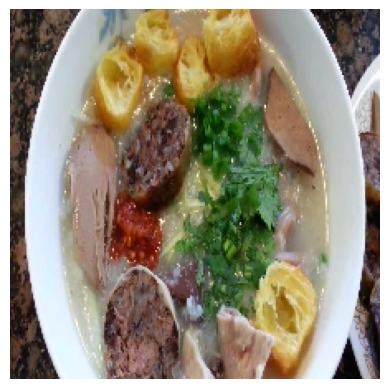

In [ ]:
print(label_predict)
plt.imshow(img.astype('uint8'))
plt.axis('off')
plt.show()

**4. Build prediction Function**

In [ ]:
def Prediction(image_path):
  img = image.load_img(image_path, target_size=(224, 224))
  img = image.img_to_array(img)

  feature = np.expand_dims(img, axis=0)
  feature = preprocess_input(feature)
  feature = efficientNet.predict(feature)
  output = classify_model.predict(feature)

  percent = output.max() * 100
  label_predict = LABELS[np.argmax(output)]

  print("model's prediction:",label_predict, "- Percentage:", percent, '%')
  plt.imshow(img.astype('uint8'))
  plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 91ms/step
model's prediction: Pho - Percentage: 95.72879672050476 %


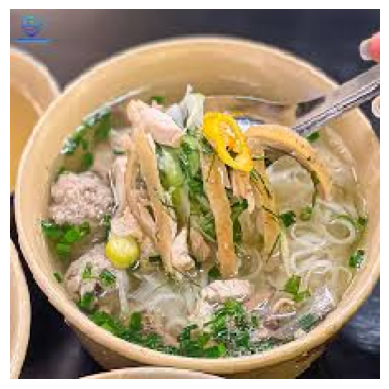

In [ ]:
Prediction('/content/pho1.jpg')